In [1]:
cd

C:\Users\aravind


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
data = pd.read_csv("data.csv")

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,predict
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


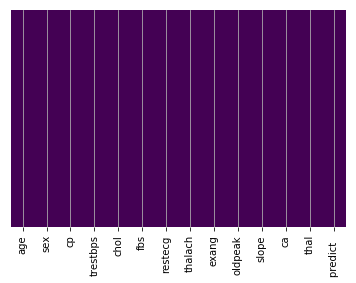

In [4]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.grid()

In [5]:
data= data.replace('?', np.nan)

In [6]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,predict
0,28,1,2,130,132,0,2,185,0,0.0,NaN,NaN,NaN,0
1,29,1,2,120,243,0,0,160,0,0.0,NaN,NaN,NaN,0
2,29,1,2,140,NaN,0,0,170,0,0.0,NaN,NaN,NaN,0
3,30,0,1,170,237,0,1,170,0,0.0,NaN,NaN,6,0
4,31,0,2,100,219,0,1,150,0,0.0,NaN,NaN,NaN,0


In [7]:
data['exang'].value_counts()

0    204
1     89
Name: exang, dtype: int64

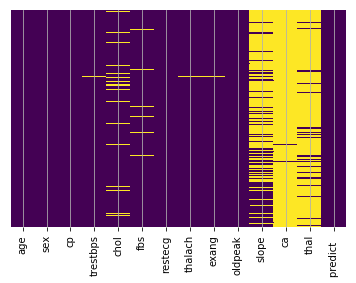

In [8]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.grid()

In [9]:
for i in ['trestbps','chol','thalach']:
    data[i] = data[i].str.extract('(\d+)').astype(float)
for i in ['trestbps','chol','thalach']:
    data[i].fillna(data[i].mean(),inplace=True)

In [10]:
data['slope'].fillna('2',inplace=True)


In [11]:
data['fbs'].fillna('0',inplace=True)

In [12]:
data['restecg'].fillna('0',inplace=True)

In [13]:
data['exang'].fillna('0',inplace=True)

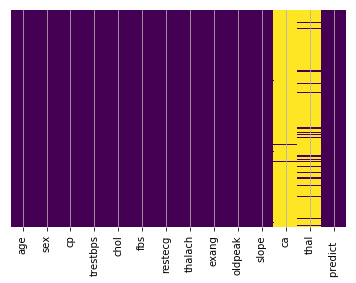

In [14]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.grid()

In [15]:
data1=data.drop(['ca','thal'],axis=1)

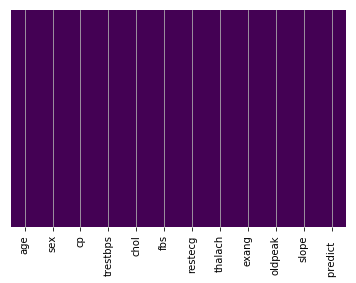

In [16]:
sns.heatmap(data1.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.grid()

In [17]:
from sklearn.preprocessing import MinMaxScaler

for i in ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope']:
    data1[i] = MinMaxScaler().fit_transform(data1[i].astype(float).values.reshape(-1, 1))

In [18]:
data1.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'predict  '],
      dtype='object')

In [19]:
data1.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'predict']

In [20]:
X = data1.drop(['predict'],axis=1)
Y = data1['predict']
print (X.shape)
print (Y.shape)

(294, 11)
(294,)


In [21]:
Y=Y.astype(int)

In [26]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
clf = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(clf, x_train,y_train)
scores.mean() 

0.7317043070467729

In [24]:
data1.to_csv("heart.csv")

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=0)

In [26]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
score = logisticRegr.score(x_test, y_test)
print(score)

0.8378378378378378


In [28]:
from sklearn.externals import joblib
filename = 'finalized_cardio_model.pkl'
joblib.dump(logisticRegr, filename)

['finalized_cardio_model.pkl']

In [44]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)

[0.07450849 0.04556679 0.1524771  0.09561549 0.10472757 0.01782961
 0.02233709 0.10638317 0.26255277 0.09495675 0.02304517]


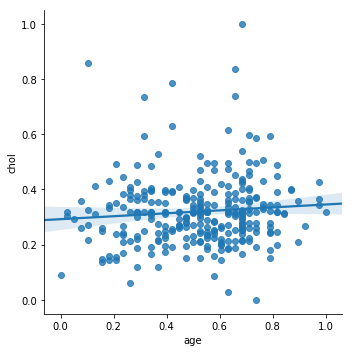

In [29]:
vis1=sns.lmplot(x='age',y='chol',data=data1,fit_reg=True)

C:\Users\aravind\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


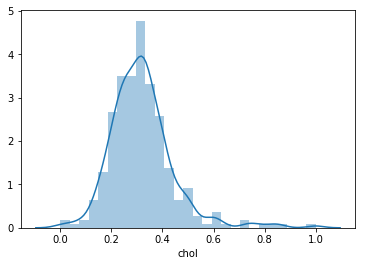

In [30]:
v1=sns.distplot(data1.chol)

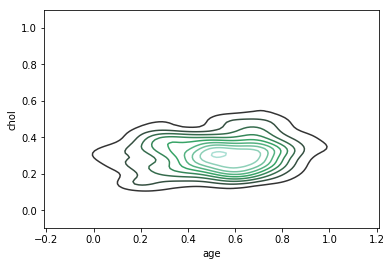

In [30]:
v2=sns.kdeplot(data1.age,data1.chol)

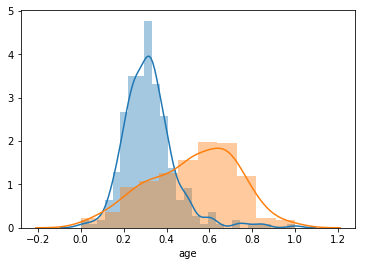

In [31]:
v3=sns.distplot(data1["chol"])
v4=sns.distplot(data1["age"])

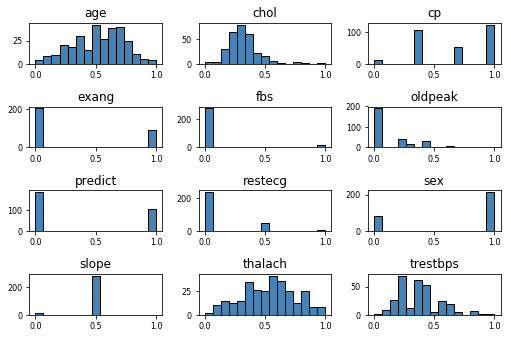

In [32]:
v5=data1.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2)) 

In [33]:
data.columns=['age','sex','chest_pain_type','rest_bp','chol','fasting_blood_sugar','rest_ecg','max_heart_rate','ex_angina','ST_depression','ST_slope','no_of_major_vessels','defect_level','predict']

In [34]:
data.head()

,age,sex,chest_pain_type,rest_bp,chol,fasting_blood_sugar,rest_ecg,max_heart_rate,ex_angina,ST_depression,ST_slope,no_of_major_vessels,defect_level,predict
0,28,1,2,130.0,132.000000,0,2,185.0,0,0.0,2,NaN,NaN,0
1,29,1,2,120.0,243.000000,0,0,160.0,0,0.0,2,NaN,NaN,0
2,29,1,2,140.0,250.848708,0,0,170.0,0,0.0,2,NaN,NaN,0
3,30,0,1,170.0,237.000000,0,1,170.0,0,0.0,2,NaN,6,0
4,31,0,2,100.0,219.000000,0,1,150.0,0,0.0,2,NaN,NaN,0


In [35]:
data

,age,sex,chest_pain_type,rest_bp,chol,fasting_blood_sugar,rest_ecg,max_heart_rate,ex_angina,ST_depression,ST_slope,no_of_major_vessels,defect_level,predict
0,28,1,2,130.0,132.000000,0,2,185.0,0,0.0,2,NaN,NaN,0
1,29,1,2,120.0,243.000000,0,0,160.0,0,0.0,2,NaN,NaN,0
2,29,1,2,140.0,250.848708,0,0,170.0,0,0.0,2,NaN,NaN,0
3,30,0,1,170.0,237.000000,0,1,170.0,0,0.0,2,NaN,6,0
4,31,0,2,100.0,219.000000,0,1,150.0,0,0.0,2,NaN,NaN,0
5,32,0,2,105.0,198.000000,0,0,165.0,0,0.0,2,NaN,NaN,0
6,32,1,2,110.0,225.000000,0,0,184.0,0,0.0,2,NaN,NaN,0
7,32,1,2,125.0,254.000000,0,0,155.0,0,0.0,2,NaN,NaN,0
8,33,1,3,120.0,298.000000,0,0,185.0,0,0.0,2,NaN,NaN,0
9,34,0,2,130.0,161.000000,0,0,190.0,0,0.0,2,NaN,NaN,0
